In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [42]:
bank_data = pd.read_csv("C:/Users/P3Fusion/OneDrive/Documents/bank-additional-full.csv", sep=';' )
print(bank_data.head())

# Check for any issues with the data (optional)
print(bank_data.info())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [40]:
categorical_columns = bank_data.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    bank_data[col] = le.fit_transform(bank_data[col])
    label_encoders[col] = le # Save label encoders for inverse_transform if needed

# Check the transformed dataset
print("Transformed dataset (with encoded categorical features):")
print(bank_data.head())

Transformed dataset (with encoded categorical features):
   age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     2        1      6   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1  ...         1    999         0         1           1.1   
1            1  ...         1    999         0         1           1.1   
2            1  ...         1    999         0         1           1.1   
3            1  ...         1    999         0         1           1.1   
4            1  ...         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr

In [38]:
X = bank_data.drop('y', axis=1) # Features
y = bank_data['y'] # Target (whether customer subscribed to term deposit)

# Display the shapes of X and y
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Feature matrix shape: (41188, 20)
Target vector shape: (41188,)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the splits
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (28831, 20)
Testing set shape: (12357, 20)


In [36]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Print the trained classifier
print("Trained Decision Tree Classifier:")
print(dt_classifier)

Trained Decision Tree Classifier:
DecisionTreeClassifier(random_state=42)


In [46]:
y_pred = dt_classifier.predict(X_test)

# Show the first few predictions
print("First few predictions:", y_pred[:10])

First few predictions: [0 0 0 0 0 1 0 0 0 0]


In [48]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Decision Tree Classifier:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy of the Decision Tree Classifier: 0.8892935178441369

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10968
           1       0.51      0.51      0.51      1389

    accuracy                           0.89     12357
   macro avg       0.72      0.73      0.72     12357
weighted avg       0.89      0.89      0.89     12357


Confusion Matrix:
[[10275   693]
 [  675   714]]


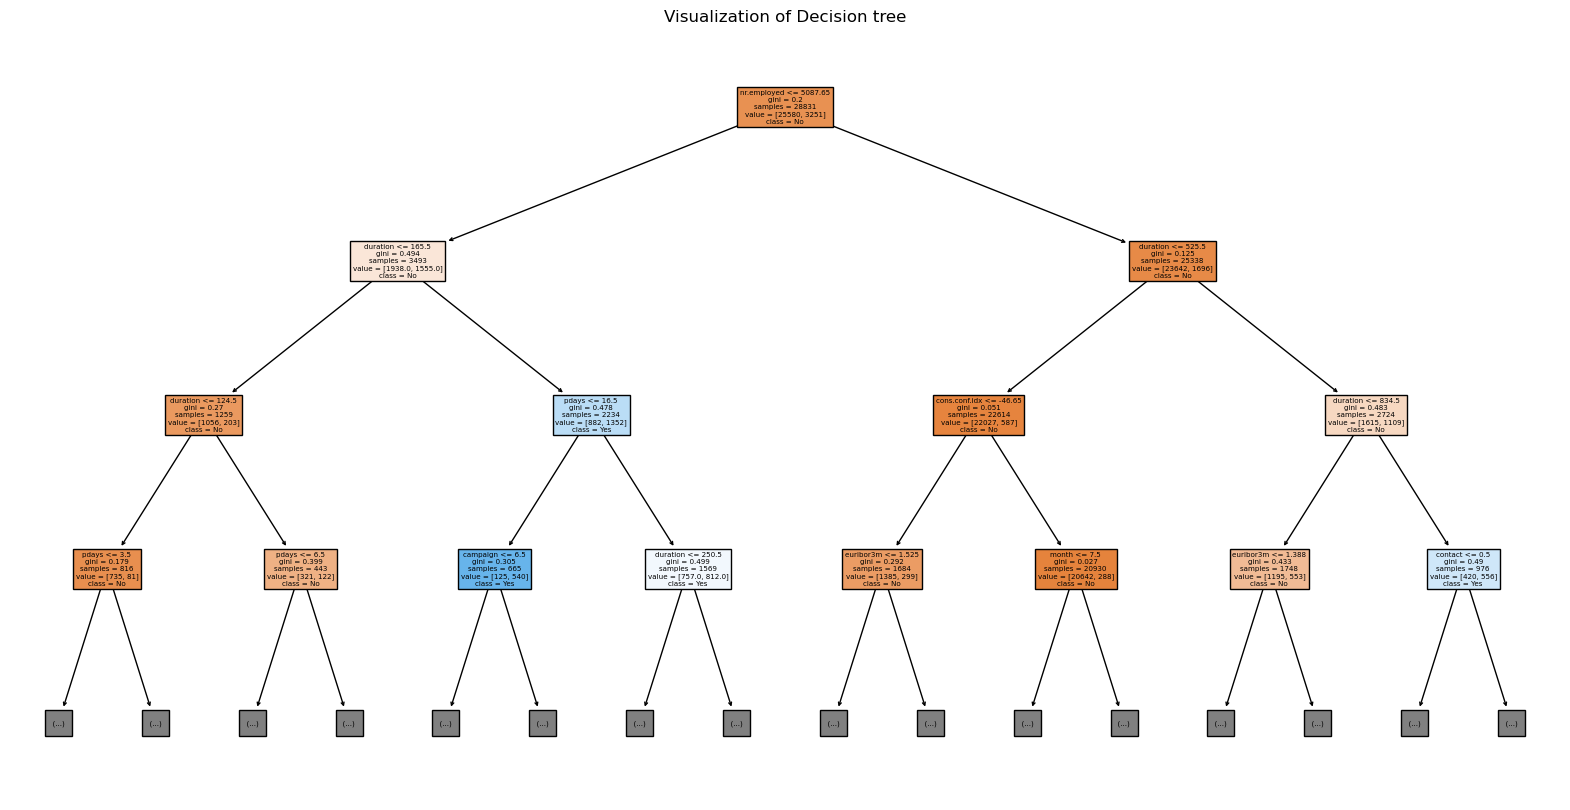

In [53]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))  # Set the figure size for clarity
plot_tree(dt_classifier, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, max_depth=3)
plt.title("Visualization of Decision tree")
plt.show()